# Capstone Project Notebook #1 - Data Cleaning & Data Preparation

#### Problem Statement
"“Using machine learning, how might one analyze patterns in top global song releases to identify what makes a song a hit, such that future releases can be tuned to have maximum impact?"

#### Overview
The purpose of this notebook is to lightly explore & clean the [Spotify YouTube](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube) dataset to get a better understanding of the data I will be working with to make predictions the factors that influence a song's popularity.

The dataset was sourced on [Kaggle](https://www.kaggle.com/) and contains over 20,000 songs by over 2,000 artists. It contains features of the songs like the musical key the song is in, the tempo, the "acousticness", the "instrumentalness", etc. as well as the number of Spotify Steams (the number of times the song was played), and the number of views, likes, and comments it recieved on YouTube.

#### Sections
[1. Data Dictionary](#section1)  
[2. Replacing Missing Stream Values](#section2)  
[3. Dropping Null Values](#section3)  
[4. Hypothesis Testing](#section4)  
[5. Additional Cleaning](#section5)  
[6. Data Export](#section6)

---

<a id='section1'></a>
### Data Dictionary
- **Track:** name of the song, as visible on the Spotify platform.
- **Artist:** name of the artist.
- **Url_spotify:** the Url of the artist.
- **Album:** the album in wich the song is contained on Spotify.
- **Album_type:** indicates if the song is relesead on Spotify as a single or contained in an album.
- **Uri:** a spotify link used to find the song through the API.
- **Danceability:** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **Energy:** is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **Key:** the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **Loudness:** the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **Speechiness:** detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Acousticness:** a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Instrumentalness:** predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Liveness:** detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Valence:** a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **Tempo:** the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **Duration_ms:** the duration of the track in milliseconds.
- **Stream:** number of streams of the song on Spotify.
- **Url_youtube:** url of the video linked to the song on Youtube, if it have any.
- **Title:** title of the videoclip on youtube.
- **Channel:** name of the channel that have published the video.
- **Views:** number of views.
- **Likes:** number of likes.
- **Comments:** number of comments.
- **Description:** description of the video on Youtube.
- **Licensed:** Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.
- **official_video:** boolean value that indicates if the video found is the official video of the song.

---

### Cleaning

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt

# I will use a simple linear regression model to fill some missing values
from sklearn.linear_model import LinearRegression # Will use a simple linear regression model to fill some missing values
from sklearn.model_selection import train_test_split

In [2]:
# Import the Spotify_Youtube dataset
df = pd.read_csv('data/Spotify_Youtube.csv')

In [3]:
# Examine the head of the dataframe
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
# Examine general info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

The data types of each column appear to be in a usable state.

In [5]:
# Examine the descriptive statistics
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [6]:
# Examine the shape of the dataframe
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 20718 rows and 28 columns


#### Duplicates
I'll start my data cleaning process by checking for duplicates in my data.

In [7]:
# Check count of duplcated rows
print(f'There are {df.duplicated().sum()} duplicates present in the data')

There are 0 duplicates present in the data


#### Null values
Next, I'll check for missing values and deal with them accordingly.

In [8]:
# Examine the sum of null values in the dataframe
df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

I can see that there are some null values in the columns above. Before proceeding, I'll need to deal with with these missing values. 

In [9]:
# Examine the rows where the key is null
df[df['Key'].isna()]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
11890,11890,Natasha Bedingfield,https://open.spotify.com/artist/7o95ZoZt5ZYn31...,These Words,Unwritten,album,spotify:track:6MFQeWtk7kxWGydnJB2y36,NaN,NaN,NaN,...,https://www.youtube.com/watch?v=e5RuGj0g1tk,Natasha Bedingfield - These Words (Official Vi...,NBedingfieldVEVO,21655597.0,165220.0,7780.0,"Natasha Bedingfield - These Words (I Love You,...",True,True,110442210.0
13843,13843,White Noise for Babies,https://open.spotify.com/artist/4ZfEELHfyKd4od...,Rain in the Early Morning,Soothing Rain for Background Sounds and Natura...,album,spotify:track:4juc1w1fGFn8CxKp8gGThc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145339552.0


It looks as though the only two songs missing features on musical features like "Key, Valence, etc." are "These Words" by Natasha Bedingfield and something called "Soothing Rain..." by a Spotify artist called "White Noise for Babies". I feel comfortable dropping these two as I do not feel that they will influence the data much. 

In [10]:
# Drop rows without musical features
df_clean1 = df.dropna(subset = ['Key'])

In [11]:
# Verify the rows have been dropped
df_clean1.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube         469
Title               469
Channel             469
Views               469
Likes               540
Comments            568
Description         875
Licensed            469
official_video      469
Stream              576
dtype: int64

There are some streaming values missing from the dataset at this point. I have two potential target variables to guage a song's popularity, (YouTube) views, or (Spotify) streams. I will try to recover that data where we can.

One potential way that I think we could approach this is to look at the ratio of streams to YouTube views and vice versa to see if I can recover the values. This approach assumes that the view-to-stream ratio is consistent across the entire dataframe, which is likely to not be the case, but it gives us a rough estimate of the number of streams or views for those missing values. 

The other approach is to use a linear regression model to predict the number of streams based on the number of views. Given that this is a data science project, I prefer this method.

---

<a id='section2'></a>
#### Method 1 - Calculate the view to stream ratio to find missing stream values

In [12]:
# Assign the dataframe with missing stream values to a temporary dataframe 
temp_df = df_clean1[df_clean1['Stream'].isna()]

In [13]:
# View the number of null values in the temp_df
temp_df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube          20
Title                20
Channel              20
Views                20
Likes                24
Comments             23
Description          33
Licensed             20
official_video       20
Stream              576
dtype: int64

In [14]:
# View the means of the (YouTube) views column and the (Spotify) Streams column
df[['Views', 'Stream']].describe()

,Views,Stream
count,2.024800e+04,2.014200e+04
mean,9.393782e+07,1.359422e+08
std,2.746443e+08,2.441321e+08
min,0.000000e+00,6.574000e+03
25%,1.826002e+06,1.767486e+07
50%,1.450110e+07,4.968298e+07
75%,7.039975e+07,1.383581e+08
max,8.079649e+09,3.386520e+09


In [15]:
# Print the means of each column
print(f"The average number of YouTube views is {round(df['Views'].mean(), 2)} and the average number of Spotify streams is {round(df['Stream'].mean(), 2)}")

The average number of YouTube views is 93937821.13 and the average number of Spotify streams is 135942190.38


In [16]:
# Get the ratio of views to streams
view_stream_ratio = round((df['Views'].mean() / df['Stream'].mean()), 4)
print(view_stream_ratio)

0.691


With a view-to-stream ratio of 0.691, all we need to do to replace our missing values is divide the number of views by our ratio to get a rough approximation of the number of streams.

---

#### Method 2 - Predict number of streams using linear regression

In [17]:
# Create dataframe without null values
no_null = df.dropna()
no_null.shape

(19170, 28)

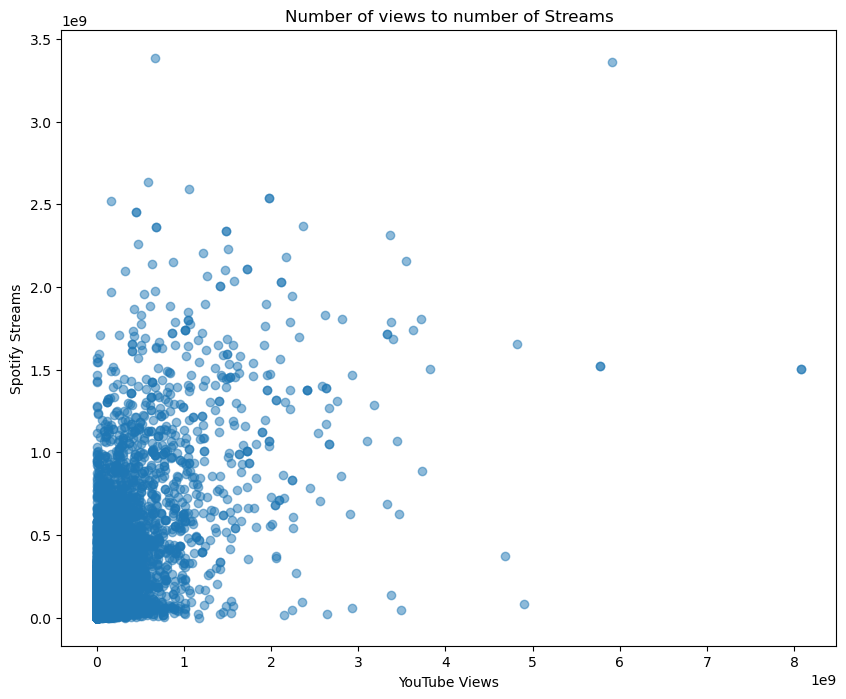

In [18]:
# Initialize the plot
plt.figure(figsize = (10,8))

# Define Scatterplot values
plt.scatter(no_null['Views'], no_null['Stream'], alpha = 0.5)
plt.title('Number of views to number of Streams')
plt.xlabel('YouTube Views')
plt.ylabel('Spotify Streams')

# Examine the plot
plt.show()

The scatter plot above, representing the relationship between the number of YouTube views and Spotify streams, is difficult to interpret due to some extreme outliers in the data. These outliers tend to skew the data and could potentially distort the perceived correlation between views and streams. One way to mitigate the impact of these outliers and make the plot easier to interpret is by applying a logarithmic scale to the axes. This transformation can minimize the visual distortion caused by the outliers, allowing for a clearer view of the overall trend and correlation between the variables.

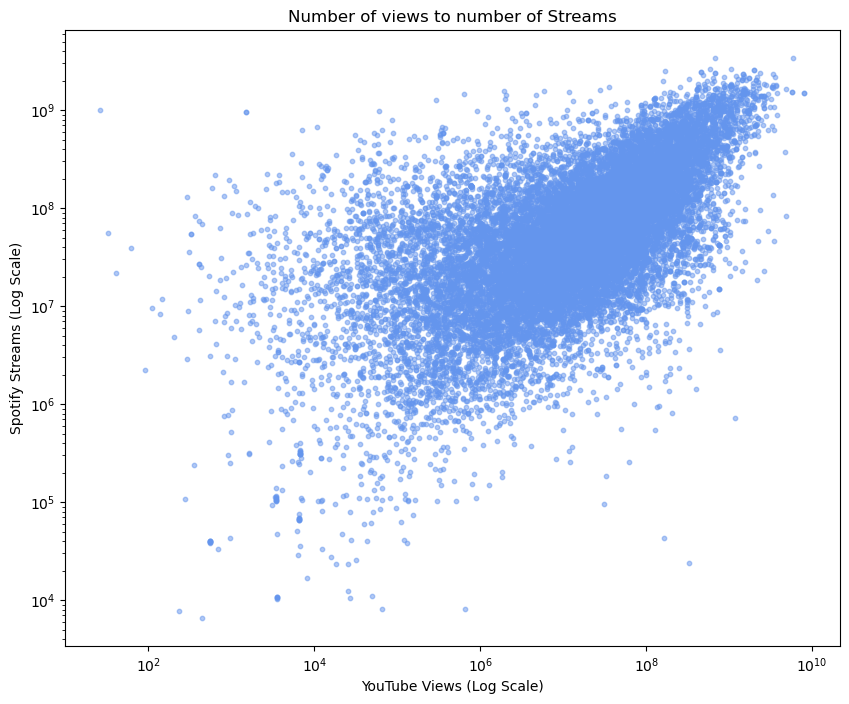

In [46]:
# Initialize the plot
plt.figure(figsize = (10,8))

# Define Scatterplot values
plt.scatter(no_null['Views'], no_null['Stream'], color='cornflowerblue', alpha = 0.5, s=10)
plt.title('Number of views to number of Streams')
plt.xlabel('YouTube Views (Log Scale)')
plt.ylabel('Spotify Streams (Log Scale)')

# Apply the log scale to the axes
plt.xscale('log')
plt.yscale('log')

# Examine the plot
plt.show()

We can see that there is a positive correlation between the two values, which would make sense - if a song is popular, listeners would likely be listening to it more on their chosen platform, in this case, Spotify our YouTube. We can see in the scatterplot above that there does appear to be a linear relationship between the two.

In [20]:
# Examine correlation between Views and Stream
no_null['Views'].corr(no_null['Stream'])

0.6041950181860534

Indeed, there is a positive correlation between the values of 60%.

I'll use a very simple Linear Regression model from scikit learn to predict and fill these Stream values.

In [21]:
# Assign features and target
X = no_null[['Views']]
y = no_null['Stream']

# Split the data into train and test sets using classic random state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiate linear regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Print the R-Squared of the model
print(f'The R-Squared of this linear regression model is {round(lr.score(X_test, y_test), 3)}')

The R-Squared of this linear regression model is 0.372


An R-Squared of 0.372 indicates that 37% of the variability of the number of streams is explained by the number of Views a song has on YouTube. This isn't a perfect solution, but will serve the purpose of filling our the missing Stream values with an approximate value.

In [22]:
# Select rows where the number of streams are null and the number of views are not null
prediction_rows = df_clean1['Stream'].isnull() & df_clean1['Views'].notnull()

# Fill the missing stream values using the linear regression prediction
df_clean1.loc[prediction_rows, 'Stream'] = lr.predict(df_clean1.loc[prediction_rows, ['Views']])

In [23]:
df_clean1.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube         469
Title               469
Channel             469
Views               469
Likes               540
Comments            568
Description         875
Licensed            469
official_video      469
Stream               20
dtype: int64

20 of the Stream values were not filled because the number of YouTube views were null as well. I will drop those rows so I can move on with the cleaning.

In [24]:
# Examine rows with missing Stream and View values
temp_df = df_clean1[df_clean1['Stream'].isna()]
print(temp_df.shape)
temp_df.head(20)

(20, 28)


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
5392,5392,José Alfredo Jimenez,https://open.spotify.com/artist/2T06whb4s6Uiuf...,En El Ultimo Trago,Viejos Amigos,album,spotify:track:2NHHppsOEAr4SUTJzHSmEt,0.578,0.456,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5894,5894,Santiago Ziesmer,https://open.spotify.com/artist/5isi7xwETQC1Hb...,Kapitel 2.2 & Kapitel 3.1 - Die kleine Hexe - ...,Die kleine Hexe - Das Hörspiel,album,spotify:track:79MPQusu1yEsrOKVF6lRYz,0.652,0.243,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5896,5896,Santiago Ziesmer,https://open.spotify.com/artist/5isi7xwETQC1Hb...,Kapitel 3.3 & Kapitel 4.1 - Die kleine Hexe - ...,Die kleine Hexe - Das Hörspiel,album,spotify:track:7MLFFmgellBUse8m8MiAa3,0.689,0.333,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5897,5897,Santiago Ziesmer,https://open.spotify.com/artist/5isi7xwETQC1Hb...,Kapitel 4.2 & Kapitel 5.1 - Die kleine Hexe - ...,Die kleine Hexe - Das Hörspiel,album,spotify:track:1XHT2kjA7ALtCD85JPe9oj,0.639,0.232,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5899,5899,Santiago Ziesmer,https://open.spotify.com/artist/5isi7xwETQC1Hb...,Kapitel 1 - Folge 47: Atomgespenster,Folge 47: Atomgespenster,album,spotify:track:0xBIT7wT6GMbxXNQzyFoDK,0.568,0.660,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5900,5900,Santiago Ziesmer,https://open.spotify.com/artist/5isi7xwETQC1Hb...,Kapitel 6.2 & Kapitel 7.1 - Die kleine Hexe - ...,Die kleine Hexe - Das Hörspiel,album,spotify:track:28kkMPsoW1tIg0hEmvEjcb,0.592,0.362,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7052,7052,KC & The Sunshine Band,https://open.spotify.com/artist/3mQBpAOMWYqAZy...,Please Don't Go - Single Version,Do You Wanna Go Party,album,spotify:track:6dw6BquK0Mv72p6HpusqKN,0.482,0.615,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7059,7059,KC & The Sunshine Band,https://open.spotify.com/artist/3mQBpAOMWYqAZy...,Boogie Shoes,Saturday Night Fever (The Original Movie Sound...,compilation,spotify:track:00rC38CxKlB12JUrFlTtdo,0.872,0.839,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7060,7060,KC & The Sunshine Band,https://open.spotify.com/artist/3mQBpAOMWYqAZy...,Get Down Tonight,KC & the Sunshine Band: 25th Anniversary Colle...,album,spotify:track:7sAWOqtpE9uWGYML3WLNGw,0.661,0.859,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7819,7819,Hector & Tito,https://open.spotify.com/artist/5aB4SpKYteOJ8p...,Baila Morena - Live,Season Finale,album,spotify:track:6GXtIudxkU3OHFOmd0o613,0.804,0.540,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above are the artists and songs that we'll pre dropping from the data set. 

In [25]:
# Drop 20 rows missing the 'Stream' value
df_clean2 = df_clean1.dropna(subset = ['Stream'])
# Verify
df_clean2.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube         449
Title               449
Channel             449
Views               449
Likes               520
Comments            548
Description         855
Licensed            449
official_video      449
Stream                0
dtype: int64

The dataframe still has 449 row missing YouTube data. I want to use the YouTube URL to see if I can find when the video was posted, because it occurs to me that the longer a video is available for, the more views it will have. I believe that some sort of measure of time will be a valuable feature in exploring the data. Given that the YouTube URL looks to be missing on 449 observations, and it would be very difficult to and time consuming to those videos, so I will drop them.  

Before doing that though, I want to take a quick look at the data that I will be dropping.

---

<a id='section3'></a>
#### Dropping Null values 
I want to explore how the means of the musical features (Key, speechiness, liveness, etc.) from the set that are missing YouTube data differ from the set that has YouTube data. 

In [26]:
# Assign null values ot a temporary variable
temp_df1 = df_clean2[df_clean2['Url_youtube'].isna()]

# Describe the distribution of numeric values in the dataframe we want to drop
temp_df1.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,449.000000,449.00000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,0.0,0.0,0.0,4.490000e+02
mean,10381.701559,0.60025,0.650933,5.124722,-7.799370,0.100005,0.393189,0.056527,0.272634,0.551499,123.005252,218292.556793,NaN,NaN,NaN,9.264893e+07
std,5790.113462,0.16677,0.226757,3.496496,5.207571,0.139782,0.276719,0.199297,0.248633,0.235946,29.403429,83174.597891,NaN,NaN,NaN,1.333116e+08
min,410.000000,0.07380,0.025200,0.000000,-38.642000,0.024700,0.000408,0.000000,0.020000,0.000010,66.607000,48466.000000,NaN,NaN,NaN,3.734000e+04
25%,5884.000000,0.51200,0.500000,2.000000,-9.341000,0.036900,0.133000,0.000000,0.101000,0.391000,101.058000,169586.000000,NaN,NaN,NaN,1.316774e+07
50%,10460.000000,0.61900,0.697000,5.000000,-6.201000,0.053600,0.381000,0.000000,0.153000,0.578000,121.221000,207323.000000,NaN,NaN,NaN,4.538047e+07
75%,15428.000000,0.71500,0.838000,8.000000,-4.521000,0.099200,0.601000,0.000114,0.368000,0.733000,142.026000,254839.000000,NaN,NaN,NaN,1.226641e+08
max,20282.000000,0.93500,0.989000,11.000000,-0.155000,0.961000,0.988000,0.995000,0.977000,0.971000,201.265000,707173.000000,NaN,NaN,NaN,1.214940e+09


In [27]:
# Assign proposed clean dataframe to a temporary variable
temp_df2 = df_clean2.dropna(subset = ['Url_youtube'])

# Describe the distribution of numeric values in the dataframe we want to keep
temp_df2.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,2.024700e+04,2.024700e+04,2.017600e+04,2.014800e+04,2.024700e+04
mean,10358.765842,0.620204,0.634972,5.303502,-7.665131,0.096068,0.289146,0.056003,0.191554,0.529305,120.604138,2.248732e+05,9.394139e+07,6.633658e+05,2.751997e+04,1.363615e+08
std,5987.329625,0.165262,0.213834,3.578103,4.616914,0.110200,0.286097,0.193219,0.165545,0.245654,29.582294,1.256048e+05,2.746506e+08,1.789365e+06,1.932394e+05,2.431609e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5169.500000,0.519000,0.507500,2.000000,-8.833000,0.035600,0.043800,0.000000,0.094000,0.339000,97.002000,1.802725e+05,1.825713e+06,2.157500e+04,5.090000e+02,1.835212e+07
50%,10354.000000,0.638000,0.666000,5.000000,-6.540000,0.050500,0.190000,0.000003,0.125000,0.536000,119.964000,2.133730e+05,1.450110e+07,1.244745e+05,3.277000e+03,5.280322e+07
75%,15552.500000,0.741000,0.797000,8.000000,-4.939500,0.103000,0.472000,0.000484,0.234000,0.726000,139.931000,2.523665e+05,7.039975e+07,5.221765e+05,1.436000e+04,1.370510e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


I can see from the output above that the means of the different music features appear to be similar between the dataset to be retained and the dataset to be dropped. However, visual similarity may not necessarily imply statistical similarity. To ensure I am not inadvertently omitting any meaningful data, I need to validate this by conducting hypothesis tests. I'll compare the means of the musical features between the two datasets, checking for statistically significant differences. This will help me determine if the omission of nearly 500 records with missing data will bias the analysis.

Let's start by examining the distributions of these numeric musical features. In the 'null data' (the data missing the YouTube URL) and the 'non-null data' (the data that has the YouTube URL).

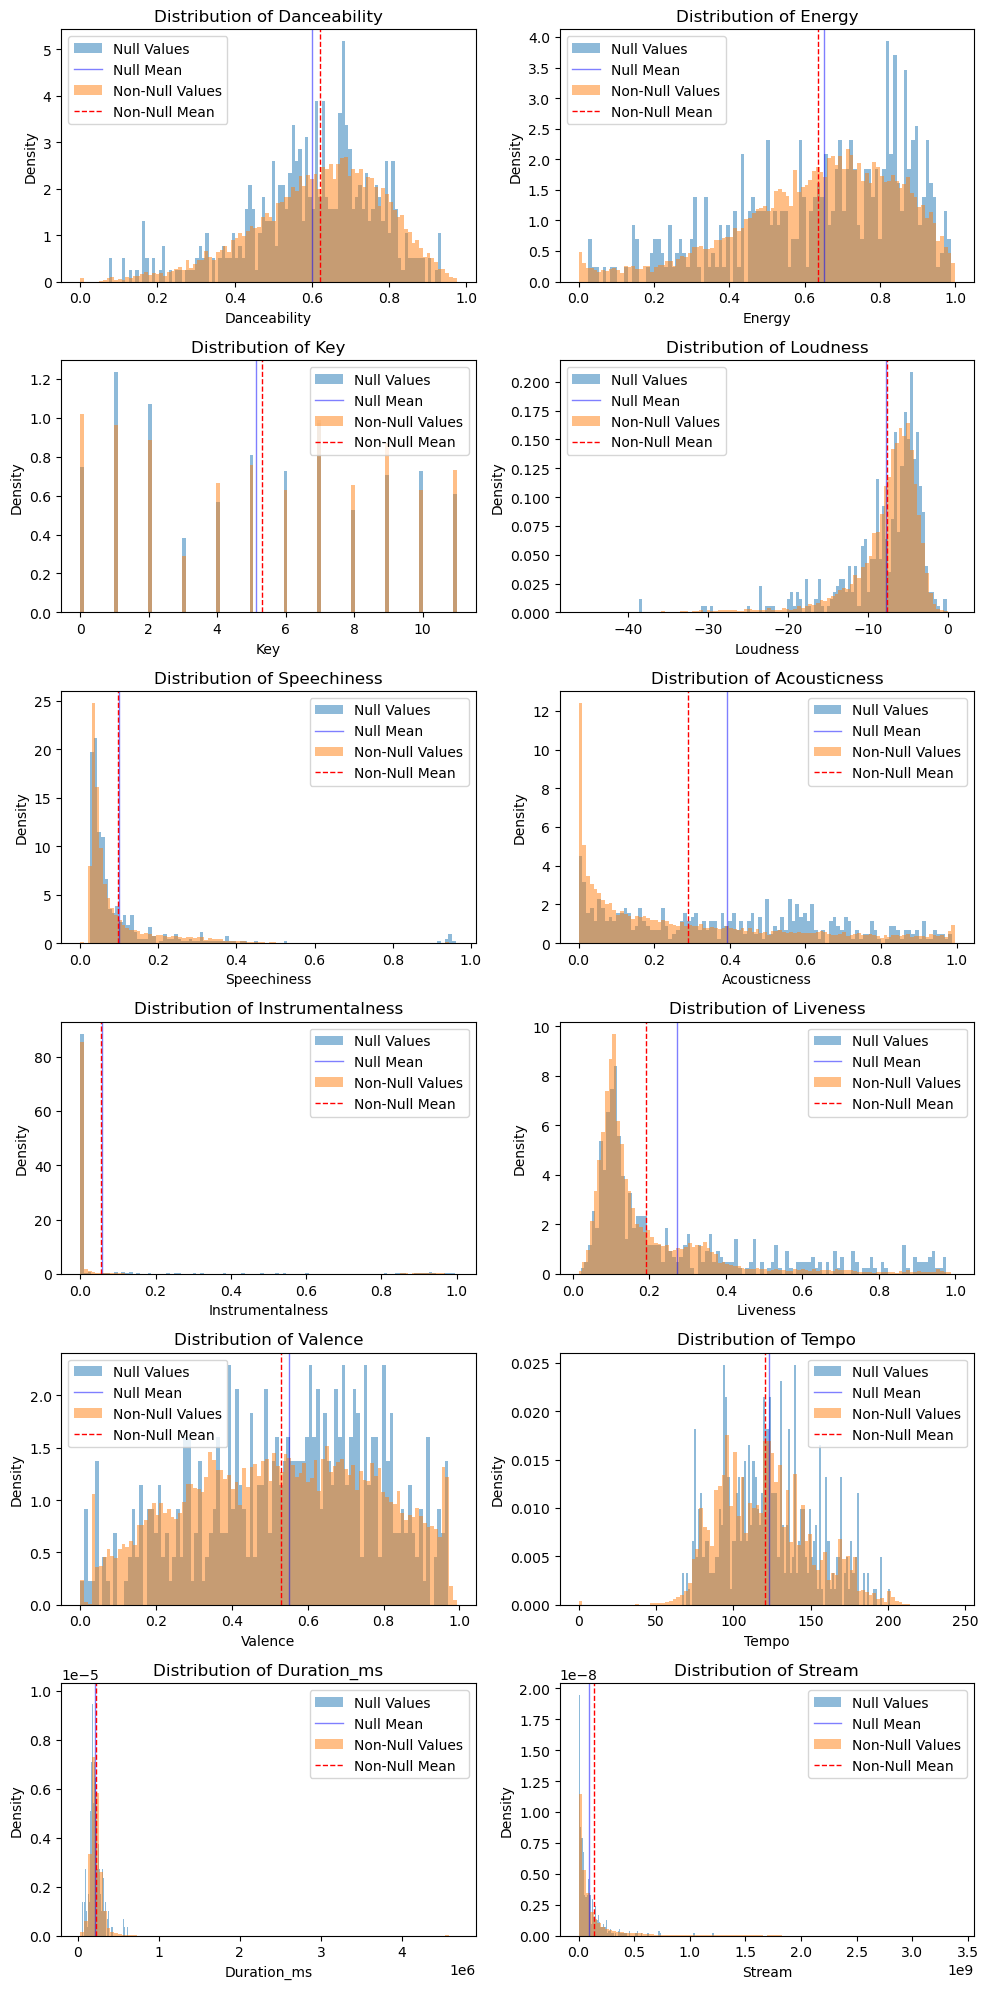

In [28]:
# Plot the distributions of each numerical column 
# instantiate subplots
plt.subplots(6, 2, figsize=(10, 20))

# Select features to test, ignoring non-numeric and null features
null_features = temp_df1.iloc[:, list(range(7,18)) + [27]]
non_null_features = temp_df2.iloc[:, list(range(7,18)) + [27]]

# Plot null
for i, col in enumerate(null_features.columns):
    plt.subplot(6,2, i+1)
    plt.hist(null_features[col], bins=100, alpha=0.5, density=True, label='Null Values')
    plt.axvline(null_features[col].mean(), color='blue', linestyle='-', linewidth=1, alpha=0.5, label='Null Mean')

# Plot non-null
for i, col in enumerate(non_null_features.columns):
    plt.subplot(6,2, i+1)
    plt.hist(non_null_features[col], bins=100, alpha=0.5, density=True, label='Non-Null Values')
    plt.axvline(non_null_features[col].mean(), color='red', linestyle='--', linewidth=1, label='Non-Null Mean')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Density')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

I'm tempted to get into the EDA portion of this project upon examining the above, but I will refrain for the time being. We can see that the non-null data have significantly less variation in their distrubition due to the fact that it has far more observations in it (20,000+), contributing to a smoother looking distribution. Note that the y-axis of these histograms is not evaluating the counts of these features, but rather the density. The distributions look similar across both the null rows to be dropped and the non-null rows. One plot stands out, however. The "Acousticness" values in the non-null data are more heavily weighted to zero than the null data. As such, we can assume that the non-null data has a higher percentage of songs that score much lower on the acousticness scale. In the context of music, this would mean that there is a higher representation of electrically (non-acoustic) created music in the non-null data.

The means are close in most cases, but appear to be noticeably different in the distributions for liveness and accousticness.

<a id='section4'></a>
#### Hypothesis Testing of Null Values Using CLT
I would like to perform a t-test to examine the statistical significance of the difference in means. However, upon observing the plots above, it appears that the data does not meet one of the assumptions of a t-test, which is that the data should be normally distributed. To address this issue, I can consider sampling means from both populations, particularly given their larger sizes, to assess if the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) applies. If the samples demonstrate a normal distribution, I can proceed with the t-test confidently.

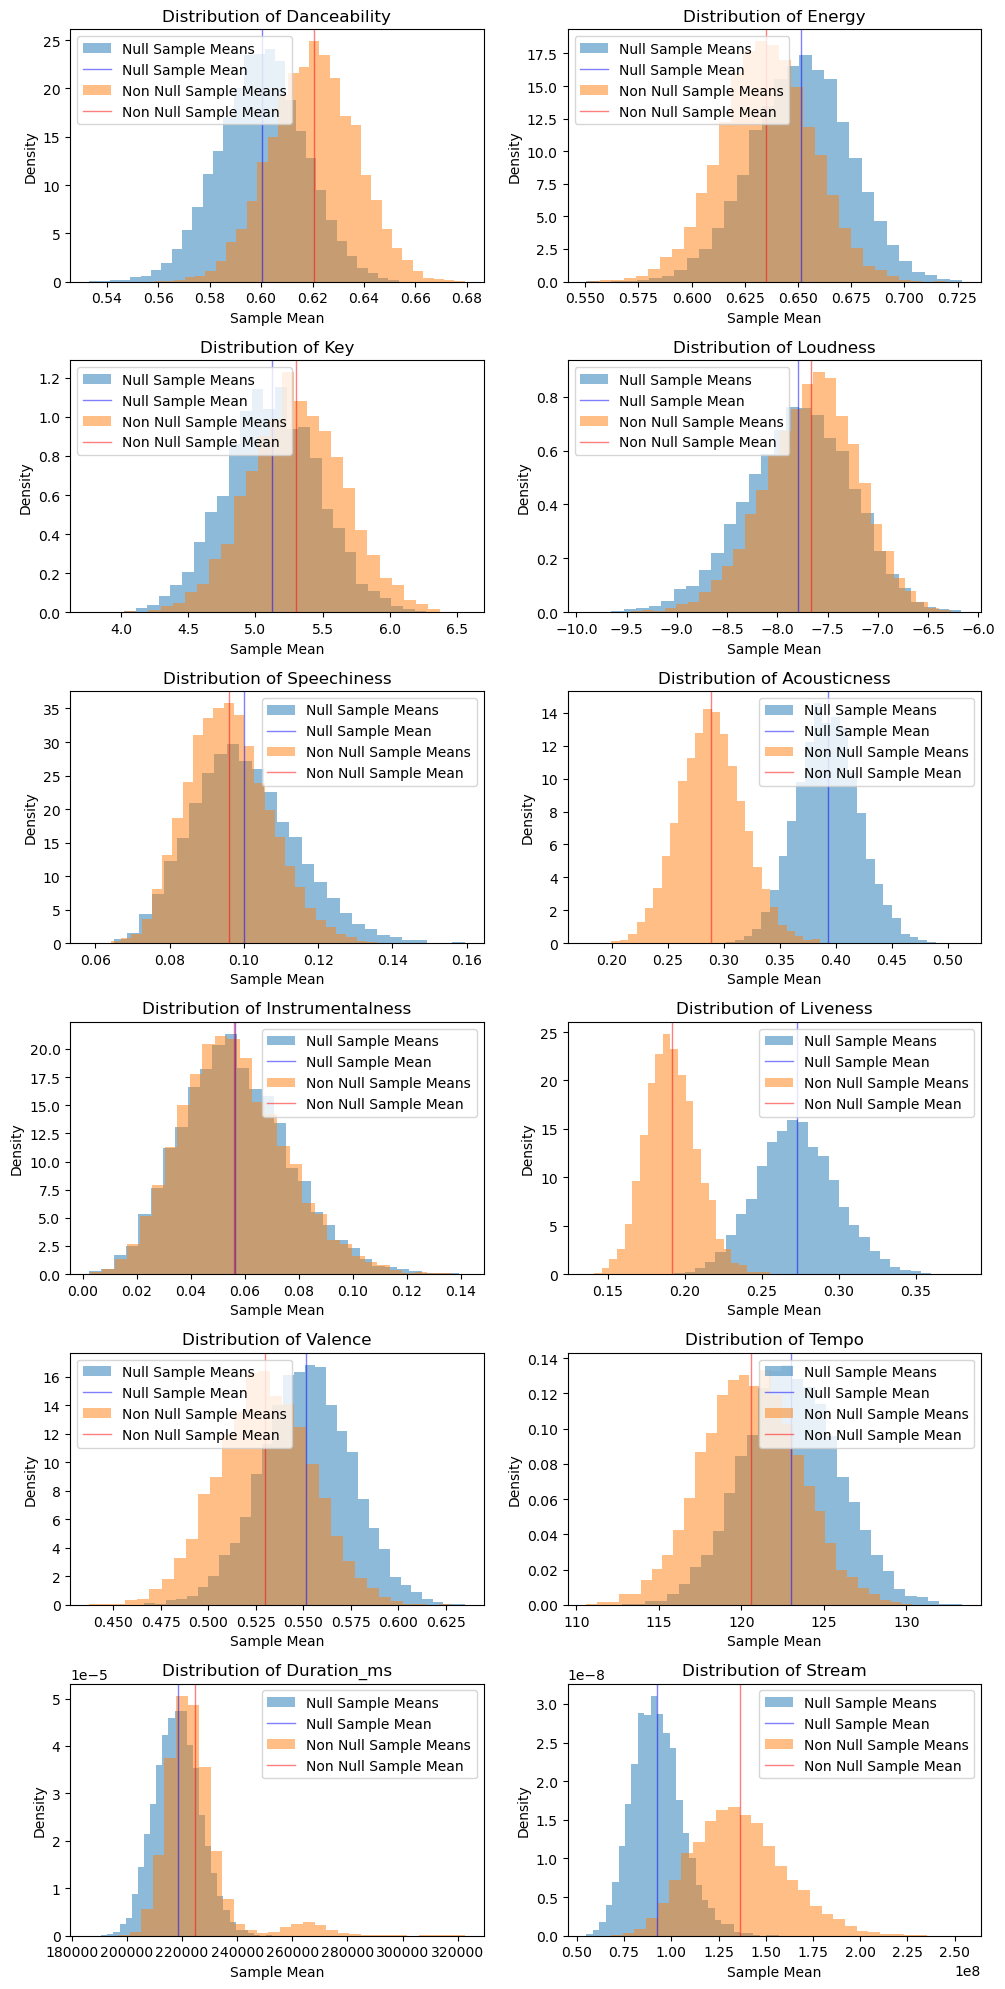

In [29]:
# Set sampling parameters
sample_size = 100
num_iterations = 10000

# Select features to test, ignoring non-numeric and null features
null_features = temp_df1.iloc[:, list(range(7,18)) + [27]]
non_null_features = temp_df2.iloc[:, list(range(7,18)) + [27]]

# Initialize array to store sample means
sample_means_null = np.zeros((num_iterations, len(null_features.columns)))
sample_means_non_null = np.zeros((num_iterations, len(non_null_features.columns)))

# Use loop to sample means
for i in range(num_iterations):
    # Sample with replacement
    null_sample = null_features.sample(n=sample_size, replace=True)
    non_null_sample = non_null_features.sample(n=sample_size, replace=True)
    
    # Store sample means to the array
    sample_means_null[i] = null_sample.mean()
    sample_means_non_null[i] = non_null_sample.mean()
    
# Plot the sample means
plt.subplots(6, 2, figsize=(10,20))

# Plot 
for i, col in enumerate(null_features.columns):
    plt.subplot(6,2, i+1)
    
    # Extract means from column i
    null_sample_means = sample_means_null[:, i]
    non_null_sample_means = sample_means_non_null[:, i]
    
    # Plot distribution of null sample means
    plt.hist(null_sample_means, bins=30, alpha=0.5, density=True, label='Null Sample Means')
    plt.axvline(null_sample_means.mean(), color='blue', linestyle='-', linewidth=1, alpha=0.5, label='Null Sample Mean')
    
    # plot distribution of non-null sample means
    plt.hist(non_null_sample_means, bins=30, alpha=0.5, density=True, label='Non Null Sample Means')
    plt.axvline(non_null_sample_means.mean(), color='red', linestyle='-', linewidth=1, alpha=0.5, label='Non Null Sample Mean')
    
    # Label plot
    plt.title(f'Distribution of {col}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    
plt.tight_layout()
plt.show()

In the above plots I can see the sample means are distributed normally under central limit theorum, which satisfies the conditions of the t-test.  

Notice that the one exception to this is that under the Duration plot, the non-null means skew more to the right in some of the samples. This tells me that in the larger dataset of 20,000 songs there are some songs that are much longer than average, which is skewing the means in some of the sampling iterations. 

#### Unpaired two sample t-test
- Data is independent of eachother
- Means are normally distributed (CLT guarantees approximate normality)
- Data in both groups are independent of eachother

#### Hypothesis
The hypothesis tests the assumption that there is no significant difference between the means of song features without missing values and those with missing values.

<center> $H_0$: $\mu_{\text{ Non-null song features}} = \mu_{\text{ Null song features}}$ $\quad vs \quad$ $H_1$: $\mu_{\text{ Non-null song features}} \neq \mu_{\text{ Null song features}}$ </center>

The significance level used for this test will be 0.05.

In [30]:
# Initialize dictionary for test results
t_test_results = {}

# Loop over columns
for col in null_features.columns:
    
    # Perform t-test
    test_result = stats.ttest_ind(null_features[col], non_null_features[col])
    
    # Add results to dictionary
    t_test_results[col] = test_result

In [31]:
# Define significance level alpha
alpha = 0.05

# Loop over test results
for col, result in t_test_results.items():
    statistic, p_value = result
    
    print(f'\nColumn: {col}')
    print(f'p-value: {p_value}')
    
    if p_value < alpha :
        print(f'Result: The Difference between means for {col} is statistically significant')
    else:
        print(f'Result: The Difference between means for {col} is not statistically significant')


Column: Danceability
p-value: 0.011412403852096475
Result: The Difference between means for Danceability is statistically significant

Column: Energy
p-value: 0.11824889692844312
Result: The Difference between means for Energy is not statistically significant

Column: Key
p-value: 0.29478701885516434
Result: The Difference between means for Key is not statistically significant

Column: Loudness
p-value: 0.5434651781722067
Result: The Difference between means for Loudness is not statistically significant

Column: Speechiness
p-value: 0.45693173201977033
Result: The Difference between means for Speechiness is not statistically significant

Column: Acousticness
p-value: 2.503087012754062e-14
Result: The Difference between means for Acousticness is statistically significant

Column: Instrumentalness
p-value: 0.9546735423229977
Result: The Difference between means for Instrumentalness is not statistically significant

Column: Liveness
p-value: 4.713105431240951e-24
Result: The Difference b

#### Interpretation
The above results shows that the difference between the following means are statistically significant:
- Danceability
- Acousticness
- Liveness
- Stream

Danceability just barely passes the significance threshold of 0.05 with a p-value of 0.0114. If we had a lower significance threshold, around say 0.01, then it would not be statistically significant. Two values that were called out earlier, acousticness, and liveness, have very low p-values, well beyond the significance level. The difference between the means was quite clear to see in the distibution visualization above. 

The mean number of streams was not so easy to identify however. On the distribution plot above, the means look to be close to eachother, but given the large scale of the number of streams, those means are more senstitive to extreme outliers. 

I will move forward with dropping these null values, but take note that the data is losing some of its representation of higher levels of acoustiness and liveness, as well as some songs with a lower average number of streams. 

<a id='section5'></a>
#### Additional Cleaning

In [32]:
# Drop rows missing with null "Url_youtube" values
df_clean3 = df_clean2.dropna(subset=['Url_youtube'])
# Verify
df_clean3.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Url_youtube           0
Title                 0
Channel               0
Views                 0
Likes                71
Comments             99
Description         406
Licensed              0
official_video        0
Stream                0
dtype: int64

I'm now left with some missing comments, likes, and video descriptions. 

Since I have no intention of using the YouTube video descriptions in any part of my analysis as the content in there is wildly inconsistent depending on who posted the video, I will simply drop that column.

In [33]:
# Drop the 'Description' column
df_clean4 = df_clean3.drop('Description', axis=1)

# Verify
df_clean4.isna().sum()

Unnamed: 0           0
Artist               0
Url_spotify          0
Track                0
Album                0
Album_type           0
Uri                  0
Danceability         0
Energy               0
Key                  0
Loudness             0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
Duration_ms          0
Url_youtube          0
Title                0
Channel              0
Views                0
Likes               71
Comments            99
Licensed             0
official_video       0
Stream               0
dtype: int64

For the missing values of likes and comments, I have two options:
1. Train a simple linear regression model on the number of YouTube views to make predictions on the number of likes and comments a video has
2. Scrape the web using the YouTube URLs provided to fill the number of missing likes and comments
3. Fill with the mean or median number of Likes & Comments.

The problem with the first approach is that I would be using the planned target variable (Views) to make a prediction about predictor variables (Likes and Comments). 

The issue with the second approach is that the number of likes and comments has likely changed since this dataset was created in early 2023, which would create some inconsistencies in the data I am working with. Of course I could update the values of all the YouTube views and Spotify streams (using the URLs provided) along with the other live updated values, but that would harm the replicability of my results as those values would constantly be changing.  

The third option is not ideal because the dataset has such a range of variance, that some data points with very few views may end up with more comments & likes than views under this method, which isn't actually possible.

In [34]:
# Examine the mean & medians of Likes & comments
print(f"Mean number of likes: {df_clean4['Likes'].mean()}")
print(f"Mean number of comments: {df_clean4['Comments'].mean()}")
print(f"Median number of likes: {df_clean4['Likes'].median()}")
print(f"Median number of comments: {df_clean4['Comments'].median()}")

Mean number of likes: 663365.7500991276
Mean number of comments: 27519.973396863214
Median number of likes: 124474.5
Median number of comments: 3277.0


In [35]:
# Assign null comments to temporary dataframe
temp_df3 = df_clean4[df_clean4['Likes'].isna()]

# View null values
temp_df3.isna().sum()

Unnamed: 0           0
Artist               0
Url_spotify          0
Track                0
Album                0
Album_type           0
Uri                  0
Danceability         0
Energy               0
Key                  0
Loudness             0
Speechiness          0
Acousticness         0
Instrumentalness     0
Liveness             0
Valence              0
Tempo                0
Duration_ms          0
Url_youtube          0
Title                0
Channel              0
Views                0
Likes               71
Comments            22
Licensed             0
official_video       0
Stream               0
dtype: int64

In [36]:
# View the min and max number of views
temp_df3['Views'].describe()

count    7.100000e+01
mean     2.252982e+07
std      4.763096e+07
min      1.362000e+03
25%      7.116880e+05
50%      5.724478e+06
75%      2.708284e+07
max      3.420514e+08
Name: Views, dtype: float64

Herein lies the problem. We can see the vast difference between the minimum and maximum values in the number of views. The lowest value being 1,362 and the highest value being 342,051,400. I can't fill the likes with the mean or median value because it is impossible for a video to have more likes or comments than views. As such, I will drop the rows with missing likes and comments.

In [37]:
# Check the distribution of null comments
temp_df4 = df_clean4[df_clean4['Comments'].isna()]

temp_df4['Views'].describe()

count    9.900000e+01
mean     4.337835e+07
std      8.394652e+07
min      4.980000e+02
25%      1.152283e+06
50%      5.684213e+06
75%      4.638426e+07
max      4.843546e+08
Name: Views, dtype: float64

In [38]:
# Drop rows with null like and comment values
df_clean5 = df_clean4.dropna(subset=['Likes', 'Comments'])
# Verify
df_clean5.isna().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [39]:
df_clean5.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,2.009900e+04,2.009900e+04,2.009900e+04,2.009900e+04,2.009900e+04
mean,10366.596796,0.620341,0.635337,5.303647,-7.657251,0.096240,0.288712,0.055870,0.191615,0.529241,120.630673,2.249283e+05,9.435381e+07,6.638502e+05,2.754543e+04,1.365438e+08
std,5993.057026,0.165293,0.213696,3.578428,4.616015,0.110331,0.285776,0.193026,0.165614,0.245403,29.595116,1.259050e+05,2.755411e+08,1.791673e+06,1.934518e+05,2.435265e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5170.500000,0.519000,0.508000,2.000000,-8.820000,0.035650,0.043800,0.000000,0.094000,0.339000,97.002000,1.803265e+05,1.841181e+06,2.165200e+04,5.130000e+02,1.839474e+07
50%,10369.000000,0.638000,0.666000,5.000000,-6.536000,0.050600,0.189000,0.000002,0.125000,0.536000,119.965000,2.133380e+05,1.459319e+07,1.247020e+05,3.289000e+03,5.284047e+07
75%,15569.500000,0.741000,0.797000,8.000000,-4.938000,0.104000,0.470000,0.000471,0.234000,0.726000,139.935000,2.524335e+05,7.061447e+07,5.221475e+05,1.436400e+04,1.369886e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


Now I am left with a dataset that is not missing any null values. But I am yet done with the cleaning. So far I've verified that there are no duplicates and have dealt with any missing values, but I want to ensure the structure and features of the dataset are suitable for the project.

In [40]:
# Examine head
df_clean5.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [41]:
# Print columns
for col in df_clean5.columns:
    print(col)

Unnamed: 0
Artist
Url_spotify
Track
Album
Album_type
Uri
Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Url_youtube
Title
Channel
Views
Likes
Comments
Licensed
official_video
Stream


The "Unnamed" column looks to be a second index, which can be dropped. There is also the Url_spotify and Uri column, which link to the page and specific song in question. I don't need columns for this project so they can be dropped as well. The Url_youtube column on the other hand, may come in handy for some feature engineering I would like to explore later, so we will keep that.  

There is also the "Artist", "Track", and "Album". I want to keep the artist & track out of interest when exploring data later, but I don't see any value in keeping the album. If I'm really curious about the album, I can simply Google the track.

In [42]:
# Drop unused columns
df_clean5.drop(['Unnamed: 0', 'Url_spotify', 'Album', 'Uri'], axis=1, inplace=True)

C:\Users\Kieran\AppData\Local\Temp\ipykernel_20340\2341153879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean5.drop(['Unnamed: 0', 'Url_spotify', 'Album', 'Uri'], axis=1, inplace=True)


In [43]:
df_clean5.head()

,Artist,Track,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,...,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,...,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,...,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,...,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,...,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,...,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


---

<a id='section6'></a>
#### Export
There is still some preprocessing work to be done. I need to encode a few variables and engineer some features, but before doing that I want to perform some exploration of the data, which will take place in another notebook.

Now that the data has been cleaned, I can export it to a new xlsx file.

In [44]:
# Export data to csv
df_clean5.to_csv('data/cleaned_data.csv', index=False)

---